In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing the data
iris=pd.read_csv('Iris.csv',index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#check if the data has any null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
iris.shape

(150, 5)

In [9]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


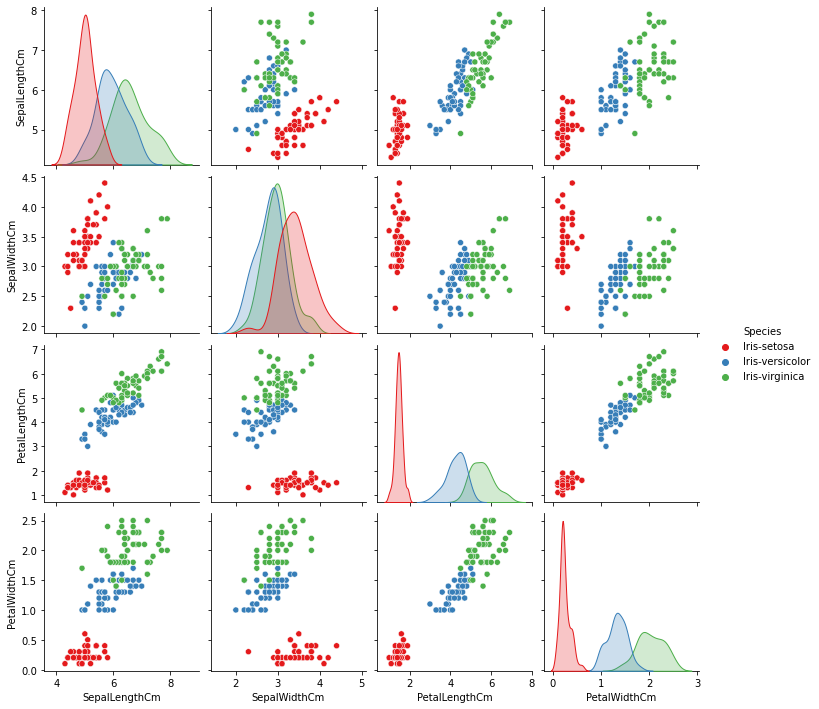

In [11]:
#Exploring Data Analysis
sns.pairplot(iris, hue="Species",palette="Set1")

In [20]:
#Split up the data into a training set and a test set
from sklearn.model_selection import train_test_split


In [21]:
#contains all the attributes and labels
X=iris.drop('Species',axis=1)
#Contains the target
y=iris["Species"]

In [22]:
X.shape

(150, 4)

In [23]:
y.shape

(150,)

In [27]:
X_train, X_test,y_train ,y_test=train_test_split(X,y,test_size=0.3)

In [28]:
print("Shape of Training data: ",X_train.shape)
print("Shape of Test data: ",X_test.shape)

Shape of Training data:  (105, 4)
Shape of Test data:  (45, 4)


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtree=DecisionTreeClassifier()

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
predictions = dtree.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [35]:
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]


In [37]:
#Compare actual vs Predicted
compare= pd.DataFrame({"Actual": y_test,"Predicted": predictions})

In [38]:
compare.head(n=10)

,Actual,Predicted
Id,,
57,Iris-versicolor,Iris-versicolor
62,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
103,Iris-virginica,Iris-virginica
127,Iris-virginica,Iris-virginica
38,Iris-setosa,Iris-setosa
144,Iris-virginica,Iris-virginica
125,Iris-virginica,Iris-virginica
135,Iris-virginica,Iris-virginica


In [39]:
#Visualize the Decision Tree
from sklearn.tree import plot_tree

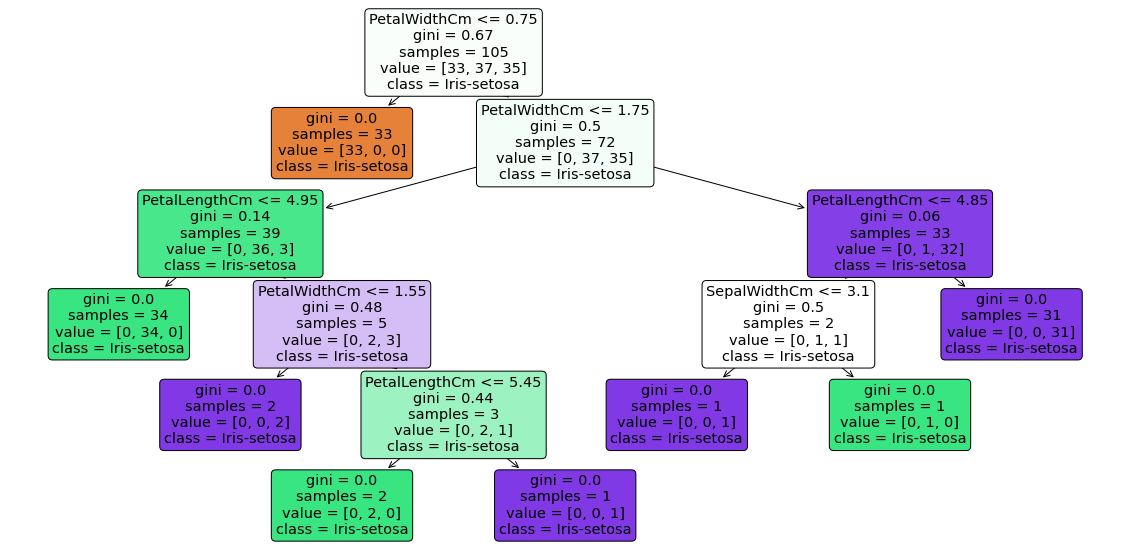

In [40]:
plt.figure(figsize=(20,10))
tree=plot_tree(dtree,feature_names=iris.columns,precision=2,rounded=True,filled=True,class_names=y.values)